<a href="https://colab.research.google.com/github/mimiachiu/Deep-Learning-with-Python-Book/blob/master/Ch06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#檢視耶拿天氣資料集的資料
import os

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Deep Learning with Python'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [ ]:
#解析資料
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
print(float_data.shape)

(420551, 14)


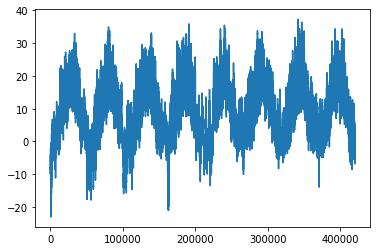

In [ ]:
from matplotlib import pyplot as plt

temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

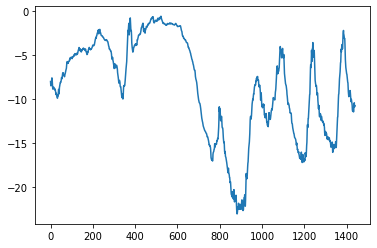

In [ ]:
plt.plot(range(1440), temp[:1440])

In [ ]:
#標準化資料
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [ ]:
#定義產生器函式以產生時間序列樣本資料及其目標資料
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1

    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows), ))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
#建立訓練資料、驗證資料和測試資料產生器
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step, batch_size=batch_size)

val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
#計算一般常識性基準方法MAE
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        print(samples.shape)
        print(targets.shape)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))

evaluate_naive_method()

(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240, 14)
(128,)
(128, 240,

In [ ]:
#基本的機器學習方法
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Using TensorFlow backend.


Epoch 1/20
500/500 [==============================] - 16s 33ms/step - loss: 0.9077 - val_loss: 0.3790
Epoch 2/20
500/500 [==============================] - 16s 33ms/step - loss: 0.3365 - val_loss: 0.2332
Epoch 3/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2823 - val_loss: 0.2246
Epoch 4/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2641 - val_loss: 0.2683
Epoch 5/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2535 - val_loss: 0.2244
Epoch 6/20
500/500 [==============================] - 16s 33ms/step - loss: 0.2445 - val_loss: 0.1680
Epoch 7/20
500/500 [==============================] - 17s 34ms/step - loss: 0.2380 - val_loss: 0.2307
Epoch 8/20
500/500 [==============================] - 16s 31ms/step - loss: 0.2327 - val_loss: 0.2603
Epoch 9/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2270 - val_loss: 0.2542
Epoch 10/20
500/500 [==============================] - 16s 31ms/step - loss: 0.224

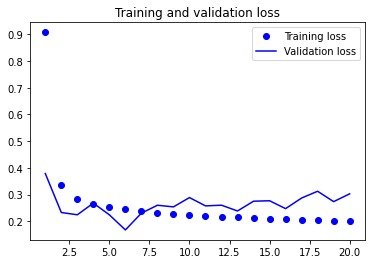

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#GRU模型的訓練與驗證
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 123s 246ms/step - loss: 0.3116 - val_loss: 0.3224
Epoch 2/20
500/500 [==============================] - 123s 246ms/step - loss: 0.2824 - val_loss: 0.3371
Epoch 3/20
500/500 [==============================] - 123s 245ms/step - loss: 0.2775 - val_loss: 0.3262
Epoch 4/20
500/500 [==============================] - 122s 245ms/step - loss: 0.2743 - val_loss: 0.3224
Epoch 5/20
500/500 [==============================] - 123s 246ms/step - loss: 0.2685 - val_loss: 0.3629
Epoch 6/20
500/500 [==============================] - 123s 246ms/step - loss: 0.2615 - val_loss: 0.3455
Epoch 7/20
500/500 [==============================] - 122s 245ms/step - loss: 0.2613 - val_loss: 0.3557
Epoch 8/20
500/500 [==============================] - 123s 246ms/step - loss: 0.2543 - val_loss: 0.3324
Epoch 9/20
500/500 [==============================] - 122s 243ms/step - loss: 0.2518 - val_loss: 0.3108
Epoch 10/20
500/500 [==============================] - 128s 256m

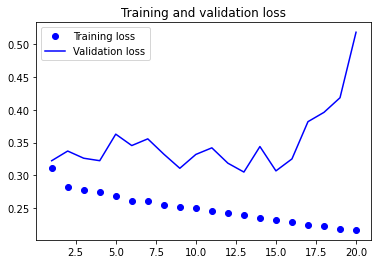

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#訓練和驗證使用丟棄法常規化的GRU模型(不知道為什麼loss非常大？)
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 277s 553ms/step - loss: 170817890841092456448.0000 - val_loss: 0.4207
Epoch 2/40
500/500 [==============================] - 275s 549ms/step - loss: 157104714436999610368.0000 - val_loss: 0.3612
Epoch 3/40
500/500 [==============================] - 274s 547ms/step - loss: 161886497538673803264.0000 - val_loss: 0.3597
Epoch 4/40
500/500 [==============================] - 273s 545ms/step - loss: 160840003684290002944.0000 - val_loss: 0.3538
Epoch 5/40
500/500 [==============================] - 273s 546ms/step - loss: 156531941473083981824.0000 - val_loss: 0.3398
Epoch 6/40
500/500 [==============================] - 272s 544ms/step - loss: 154742620223792873472.0000 - val_loss: 0.3286
Epoch 7/40
500/500 [==============================] - 274s 547ms/step - loss: 158419029809777278976.0000 - val_loss: 0.3443
Epoch 8/40
500/500 [==============================] - 273s 545ms/step - loss: 157214205322219552768.0000 - val_loss: 0.3605
Epoch 9/

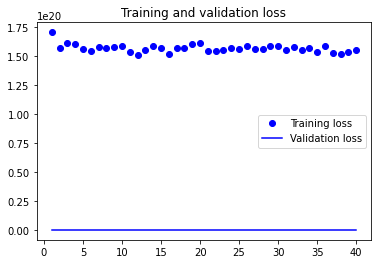

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#訓練和驗證使用丟棄法的堆疊的GRU模型(不知道為什麼loss是nan？)
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5, return_sequences=True, input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu', dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Using TensorFlow backend.


Epoch 1/40
500/500 [==============================] - 284s 569ms/step - loss: nan - val_loss: nan
Epoch 2/40
500/500 [==============================] - 283s 565ms/step - loss: nan - val_loss: nan
Epoch 3/40
500/500 [==============================] - 283s 566ms/step - loss: nan - val_loss: nan
Epoch 4/40
500/500 [==============================] - 284s 567ms/step - loss: nan - val_loss: nan
Epoch 5/40
500/500 [==============================] - 284s 567ms/step - loss: nan - val_loss: nan
Epoch 6/40
500/500 [==============================] - 287s 574ms/step - loss: nan - val_loss: nan
Epoch 7/40
500/500 [==============================] - 284s 567ms/step - loss: nan - val_loss: nan
Epoch 8/40
500/500 [==============================] - 287s 574ms/step - loss: nan - val_loss: nan
Epoch 9/40
500/500 [==============================] - 284s 568ms/step - loss: nan - val_loss: nan
Epoch 10/40
500/500 [==============================] - 285s 570ms/step - loss: nan - val_loss: nan
Epoch 11/40
500/500

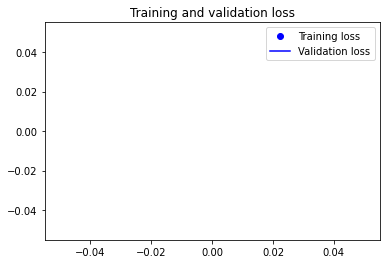

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#使用反向序列資料訓練和驗證LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers

from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

17465344/17464789 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.5357 - acc: 0.7394 - val_loss: 0.3891 - val_acc: 0.8436
Epoch 2/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.3287 - acc: 0.8715 - val_loss: 0.4598 - val_acc: 0.8304
Epoch 3/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2615 - acc: 0.9031 - val_loss: 0.5178 - val_acc: 0.8212
Epoch 4/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.2271 - acc: 0.9178 - val_loss: 0.3299 - val_acc: 0.8754
Epoch 5/10
20000/20000 [==============================] - 70s 3ms/step - loss: 0.2045 - acc: 0.9268 - val_loss: 0.3743 - val_acc: 0.8468
Epoch 6/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1731 - acc: 0.9391 - val_loss: 0.3656 - val_acc: 0.8612
Epoch 7/10
20000/20000 [==============================] - 70s 4ms/step - loss: 0.1544 - acc: 0.9468 - val_loss: 0.7877 - val_acc:

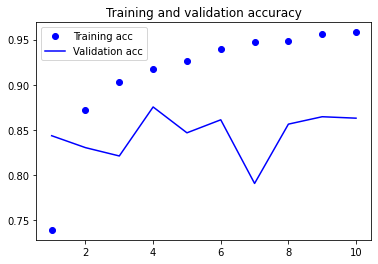

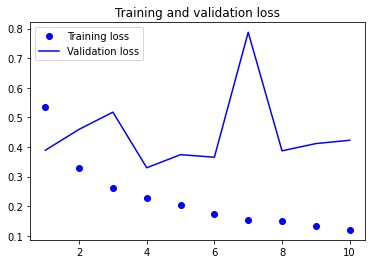

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#訓練和驗證雙向LSTM
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.5397 - acc: 0.7300 - val_loss: 0.5015 - val_acc: 0.7806
Epoch 2/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.3292 - acc: 0.8705 - val_loss: 0.3450 - val_acc: 0.8660
Epoch 3/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.2605 - acc: 0.9015 - val_loss: 0.4147 - val_acc: 0.8246
Epoch 4/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.2187 - acc: 0.9215 - val_loss: 0.3747 - val_acc: 0.8742
Epoch 5/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.1994 - acc: 0.9299 - val_loss: 0.4103 - val_acc: 0.8730
Epoch 6/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.1806 - acc: 0.9364 - val_loss: 0.3314 - val_acc: 0.8868
Epoch 7/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.1577 - acc: 0.9444 - val_loss: 0.3804 - v

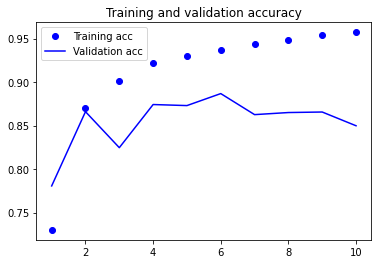

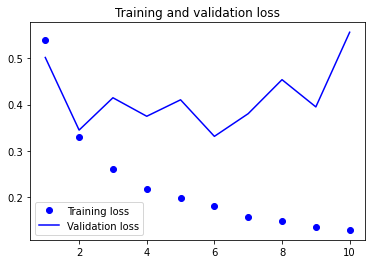

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#訓練雙向GRU進行溫度預測任務
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 176s 353ms/step - loss: 0.2901 - val_loss: 0.1509
Epoch 2/40
500/500 [==============================] - 176s 352ms/step - loss: 0.2744 - val_loss: 0.1137
Epoch 3/40
500/500 [==============================] - 176s 352ms/step - loss: 0.2679 - val_loss: 0.1514
Epoch 4/40
500/500 [==============================] - 176s 353ms/step - loss: 0.2622 - val_loss: 0.1225
Epoch 5/40
500/500 [==============================] - 176s 352ms/step - loss: 0.2591 - val_loss: 0.1516
Epoch 6/40
500/500 [==============================] - 177s 354ms/step - loss: 0.2542 - val_loss: 0.1509
Epoch 7/40
500/500 [==============================] - 176s 352ms/step - loss: 0.2484 - val_loss: 0.1384
Epoch 8/40
500/500 [==============================] - 176s 352ms/step - loss: 0.2411 - val_loss: 0.1898
Epoch 9/40
500/500 [==============================] - 176s 352ms/step - loss: 0.2355 - val_loss: 0.1801
Epoch 10/40
500/500 [==============================] - 176s 351m

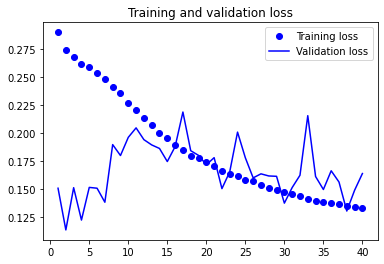

In [ ]:
#繪製結果
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()